In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

In [3]:
test=pd.read_csv('/home/aloka/Documents/NLP Project/hand-gesture-model-train/archive (3)/sign_mnist_test.csv')
train=pd.read_csv('/home/aloka/Documents/NLP Project/hand-gesture-model-train/archive (3)/sign_mnist_train.csv')

In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
train.shape

(27455, 785)

In [6]:
# Get the training labels
labels = train["label"].values
labels

array([ 3,  6,  2, ..., 18, 17, 23])

In [7]:
# View the unique labels , 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

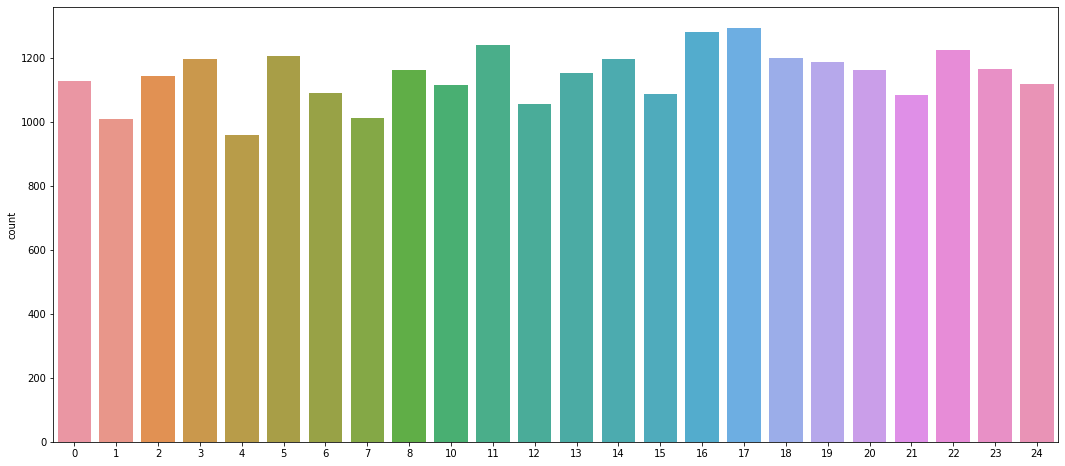

In [8]:
# Plot the quantities in each class
plt.figure(figsize=(18,8))
sns.countplot(x = labels)

In [9]:
# Drop training labels from our training data. So we can seperate it.
train.drop('label',axis = 1, inplace = True)

In [10]:
# Extract the image data from eaach row in our csv , remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28,28))for i in images])
images = np.array([i.flatten()for i in images])

In [11]:
# Hot one encode the labels
from sklearn.preprocessing import LabelBinarizer

label_binerizer = LabelBinarizer()
labels = label_binerizer.fit_transform(labels)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


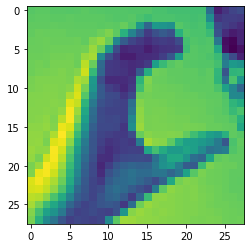

In [12]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [13]:
# Use openCV to view 10 random images from our training data
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx = 10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [14]:
# Split the data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size =0.3, random_state=101
                                                   )

In [15]:
# Start loading tensorflow modules and define batch size etc.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

2022-05-04 01:27:20.129335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aloka/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-04 01:27:20.129354: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
# Scale the images
x_train = x_train/255
x_test = x_test/255

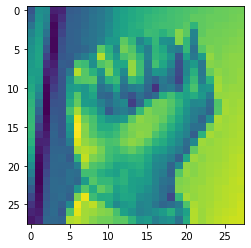

In [17]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

In [18]:
# Create the CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

2022-05-04 01:27:21.108959: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-04 01:27:21.108985: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aloka-HP-Laptop-15s-fq2xxx): /proc/driver/nvidia/version does not exist
2022-05-04 01:27:21.109241: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer =Adam(),
             metrics = ['accuracy'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [21]:
# Trin the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 8s 51ms/step - loss: 2.5924 - accuracy: 0.2080 - val_loss: 1.5498 - val_accuracy: 0.5013
Epoch 2/10
151/151 [==============================] - 8s 54ms/step - loss: 1.1750 - accuracy: 0.6123 - val_loss: 0.7639 - val_accuracy: 0.7570
Epoch 3/10
151/151 [==============================] - 9s 59ms/step - loss: 0.6849 - accuracy: 0.7687 - val_loss: 0.4739 - val_accuracy: 0.8571
Epoch 4/10
151/151 [==============================] - 9s 60ms/step - loss: 0.4506 - accuracy: 0.8513 - val_loss: 0.3594 - val_accuracy: 0.8809
Epoch 5/10
151/151 [==============================] - 9s 58ms/step - loss: 0.3217 - accuracy: 0.8957 - val_loss: 0.1890 - val_accuracy: 0.9507
Epoch 6/10
151/151 [==============================] - 9s 59ms/step - loss: 0.2133 - accuracy: 0.9317 - val_loss: 0.1257 - val_accuracy: 0.9679
Epoch 7/10
151/151 [==============================] - 10s 64ms/step - loss: 0.1489 - accuracy: 0.9567 - val_loss: 0.0932 - val_accuracy: 0.974

In [22]:
# Save the model
model.save("sign_mnist_cnn_50_Epochs.hs")
print("Model saved")

2022-05-04 01:28:49.311905: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: sign_mnist_cnn_50_Epochs.hs/assets
Model saved


<function matplotlib.pyplot.show(close=None, block=None)>

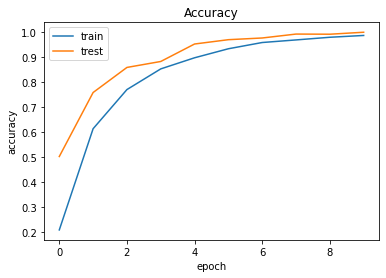

In [23]:
# View the training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','trest'])

plt.show


In [24]:
# Reshape test data. So that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label',axis =1, inplace=True)

test_images = test.values
test_images =np.array([np.reshape(i,(28,28))for i in test_images])
test_images = np.array([i.flatten()for i in test_images])

test_labels = label_binerizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0],28,28,1)

test_images.shape

y_pred = model.predict(test_images)

In [25]:
# Get the accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.835750139431121

In [32]:
# Create function to match label to letter
def getLetter(result):
    classLabels = {0:'A',
                   1:'B',
                   2:'C',
                   3:'D',
                   4:'E',
                   5:'F',
                   6:'G',
                   7:'H',
                   8:'I',
                   9:'K',
                   10:'L',
                   11:'M',
                   12:'N',
                   13:'O',
                   14:'P',
                   15:'Q',
                   16:'R',
                   17:'S',
                   18:'T',
                   19:'U',
                   20:'V',
                   21:'W',
                   22:'X',
                   23:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [31]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame =cap.read()

    roi=frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi =cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation= cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy =frame.copy()
    cv2.rectangle(copy, (320,100), (620, 400), (255,0,0), 5)

    roi =roi.reshape(1,28,28,1)
    predict_x=model.predict(roi, 1) 
    classes_x=np.argmax(predict_x,axis=1)
    result=str(classes_x[0])

    # result= str(model.predict(roi, 1, verbosa =0)[0])
    cv2.putText(copy, getLetter(result), (300,300), cv2.FONT_HERSHEY_COMPLEX, 2, (0,255,0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(33) == 27:
        break
cap.release()
cv2.destroyAllWindows()
    

